In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

### SCATTER PLOT

In [2]:
fuel = pd.read_csv('../data/fuel_econ.csv')
print(fuel.head())

      id        make           model  year           VClass  \
0  32204      Nissan            GT-R  2013  Subcompact Cars   
1  32205  Volkswagen              CC  2013     Compact Cars   
2  32206  Volkswagen              CC  2013     Compact Cars   
3  32207  Volkswagen      CC 4motion  2013     Compact Cars   
4  32208   Chevrolet  Malibu eAssist  2013     Midsize Cars   

               drive              trans          fuelType  cylinders  displ  \
0    All-Wheel Drive    Automatic (AM6)  Premium Gasoline          6    3.8   
1  Front-Wheel Drive  Automatic (AM-S6)  Premium Gasoline          4    2.0   
2  Front-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
3    All-Wheel Drive     Automatic (S6)  Premium Gasoline          6    3.6   
4  Front-Wheel Drive     Automatic (S6)  Regular Gasoline          4    2.4   

   pv2  pv4     city    UCity  highway  UHighway     comb  co2  feScore  \
0   79    0  16.4596  20.2988  22.5568   30.1798  18.7389  471        4

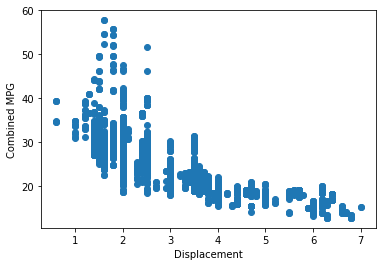

In [3]:
# Scatterplot in Matplotlib
plt.scatter(data = fuel, x = 'displ', y = 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


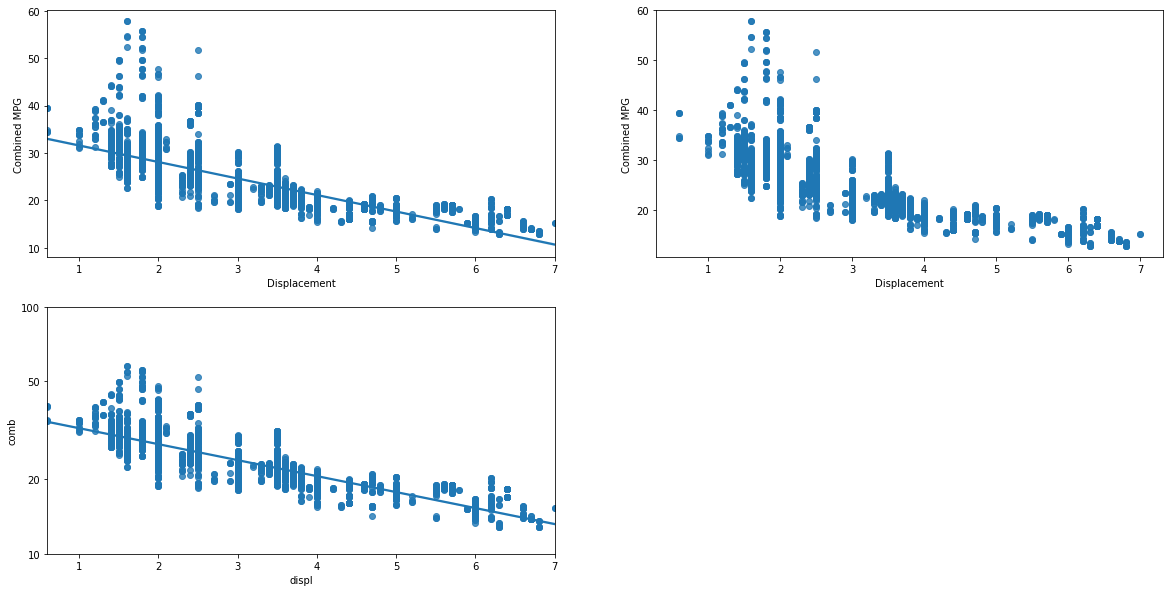

In [4]:
# Scatterplot in Seaborn
plt.figure(figsize = [20, 10])
plt.subplot(2, 2, 1)
sb.regplot(data = fuel, x = 'displ', y = 'comb')
plt.xlabel('Displacement')
plt.ylabel('Combined MPG')

# Scatterplot without regression line in Seaborn
plt.subplot(2, 2, 2)
sb.regplot(data = fuel, x = 'displ', y = 'comb', fit_reg = False)
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

# Plot regression line on transformed data
def log_trans(x, inverse = False):
    if inverse:
        return np.power(10, x)
    else:
        return np.log10(x)
    
plt.subplot(2, 2, 3)
sb.regplot(fuel['displ'], fuel['comb'].apply(log_trans))
tick_locs = [10, 20, 50, 100]
plt.yticks(log_trans(tick_locs), tick_locs);

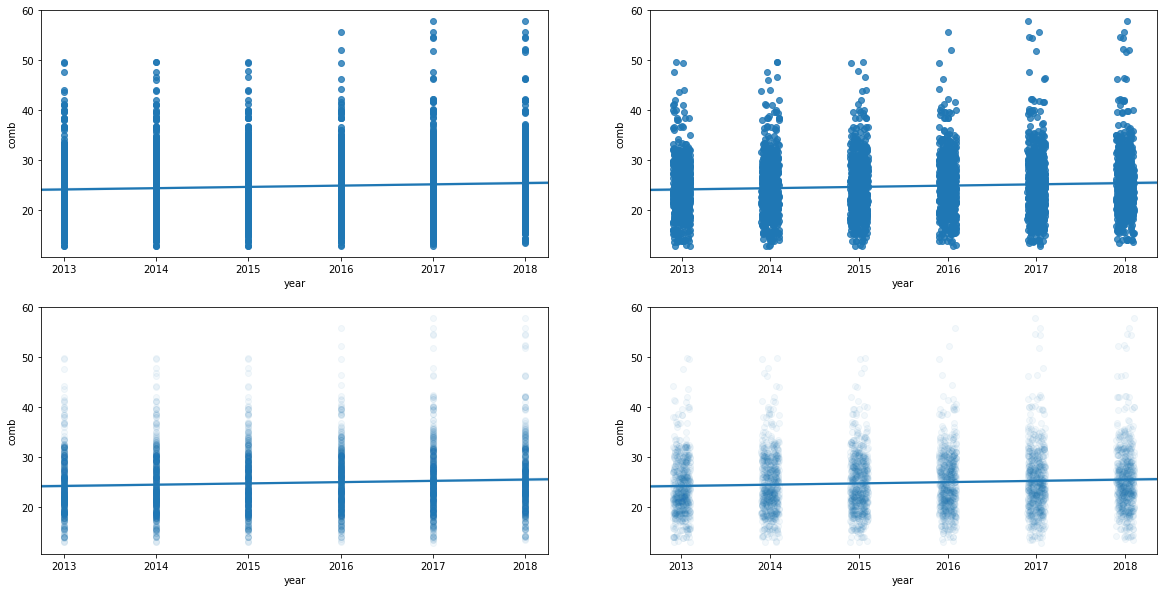

In [5]:
# Plot discrete data, add jitter and transparency to see trends easier
plt.figure(figsize = [20, 10])

#Original Plot
plt.subplot(2, 2, 1)
sb.regplot(data = fuel, x = 'year', y = 'comb', truncate = False);

# Add jitter
plt.subplot(2, 2, 2)
sb.regplot(data = fuel, x = 'year', y = 'comb', truncate = False, x_jitter = .1);

# Add transparency (can also use Matplotlib:scatter(), but no ability to provide jitter)
plt.subplot(2, 2, 3)
sb.regplot(data = fuel, x = 'year', y = 'comb', truncate = False, scatter_kws = {'alpha': .05})

# Add transparency and jitter
plt.subplot(2, 2, 4)
sb.regplot(data = fuel, x = 'year', y = 'comb', truncate = False, x_jitter = .1, scatter_kws = {'alpha': .05});

### HEAT MAPS
2-D histogram

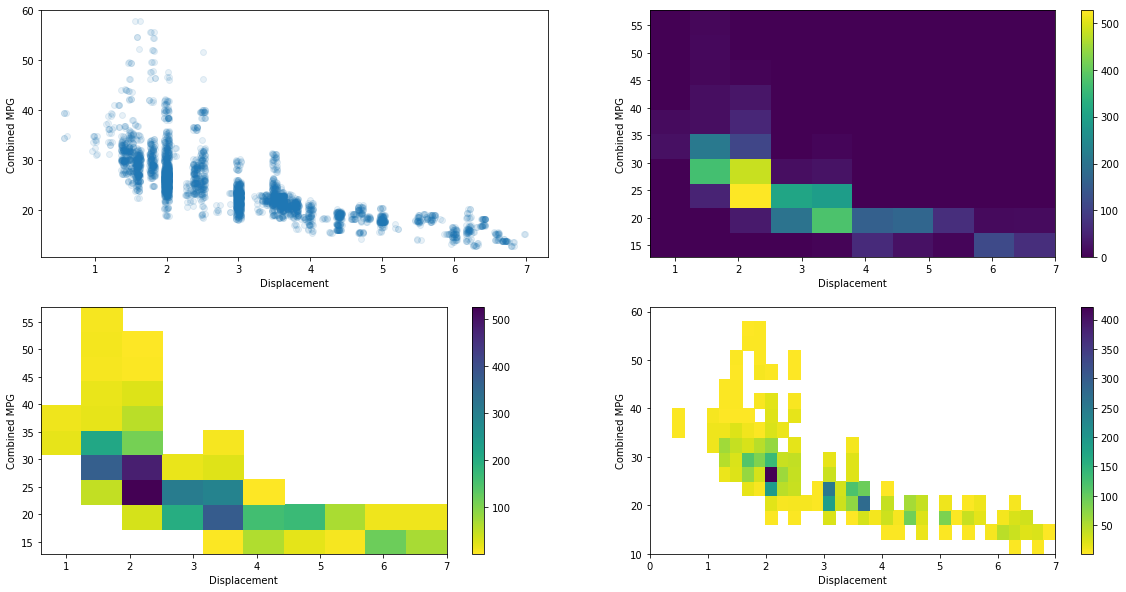

In [6]:
plt.figure(figsize = [20, 10])

# Default scatter plot
plt.subplot(2, 2, 1)
sb.regplot(data = fuel, x = 'displ', y = 'comb', x_jitter = .04, scatter_kws = {'alpha': .1}, fit_reg = False)
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

# Default heatmap plot
plt.subplot(2, 2, 2)
plt.hist2d(data = fuel, x = 'displ', y = 'comb')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

# Use cmin to set minimum bounds of counts, Use cmap to reverse color map
plt.subplot(2, 2, 3)
heat_map = plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin = .5, cmap = 'viridis_r')
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

# Specify bin edges
plt.subplot(2, 2, 4)
x_bin_width = .2
y_bin_width = 3
x_bins = np.arange(0, 7 + x_bin_width, x_bin_width)
y_bins = np.arange(10, 60 + y_bin_width, y_bin_width)
plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin = .5, cmap = 'viridis_r', bins = [x_bins, y_bins])
plt.colorbar()
plt.xlabel('Displacement')
plt.ylabel('Combined MPG');

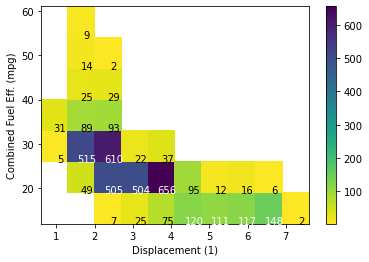

In [7]:
# Specify bin edges 
bins_x = np.arange(0.6, 7+0.7, 0.7)
bins_y = np.arange(12, 58+7, 7)
# Use cmin to set a minimum bound of counts 
# Use cmap to reverse the color map. 
h2d = plt.hist2d(data = fuel, x = 'displ', y = 'comb', cmin=0.5, cmap='viridis_r', bins = [bins_x, bins_y])

plt.colorbar()
plt.xlabel('Displacement (1)')
plt.ylabel('Combined Fuel Eff. (mpg)');

# Select the bi-dimensional histogram, a 2D array of samples x and y. 
# Values in x are histogrammed along the first dimension and 
# values in y are histogrammed along the second dimension.
counts = h2d[0]

# Add text annotation on each cell
# Loop through the cell counts and add text annotations for each
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'white')
        elif c > 0:
            plt.text(bins_x[i]+0.5, bins_y[j]+0.5, int(c),
                     ha = 'center', va = 'center', color = 'black')

### VIOLIN PLOTS AND BOX PLOTS

<ipython-input-8-aea38f148415>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(3, 2, 1)


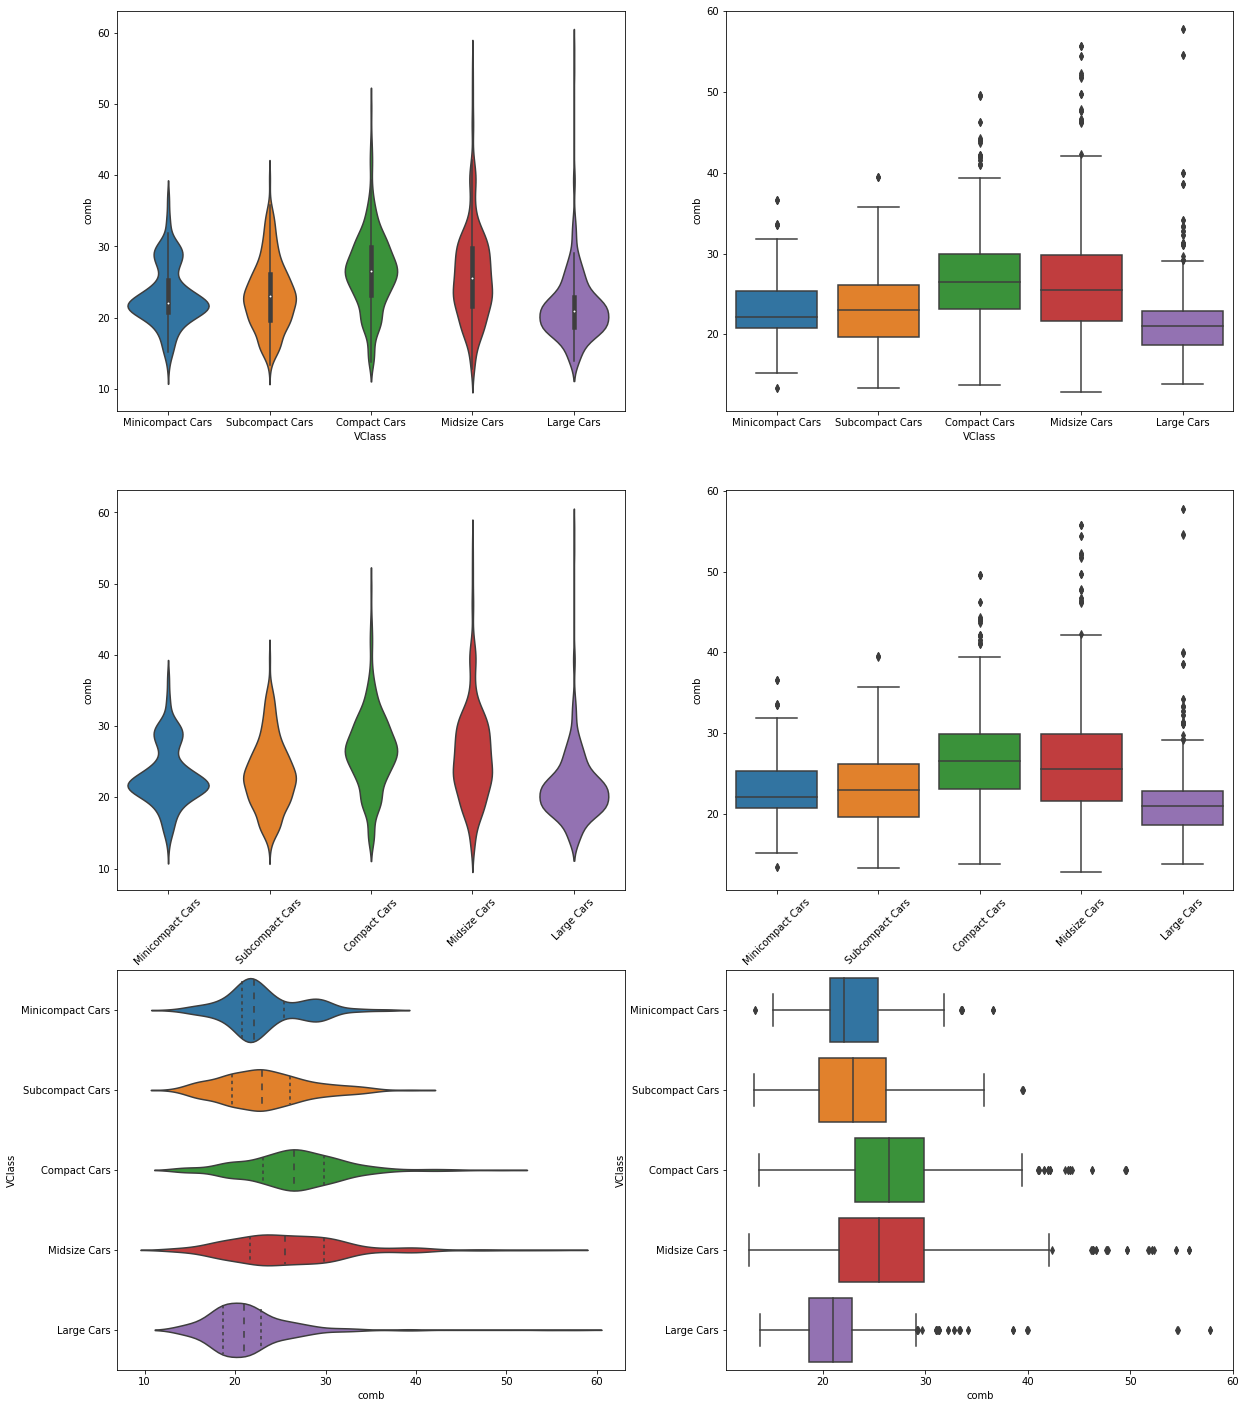

In [8]:
plt.figure(figsize = [20, 25])

# Types of sedans
plt.subplot(3, 2, 1)
sedans = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

#  Returns the types for sedan classes with the categories and orderedness
vclasses = pd.api.types.CategoricalDtype(ordered = True, categories = sedans)

# Use pandas.astype() to convert 'vclass' column from plain object to ordered categorical object
fuel['VClass'] = fuel['VClass'].astype(vclasses)

# Base violionplot
plt.subplot(3, 2, 1)
sb.violinplot(data = fuel, x = 'VClass', y = 'comb')

plt.subplot(3, 2, 2)
sb.boxplot(data = fuel, x = 'VClass', y = 'comb')

# Remove datapoints in the interior
plt.subplot(3, 2, 3)
sb.violinplot(data = fuel, x = 'VClass', y = 'comb', inner = None)
plt.xticks(rotation = 45);

plt.subplot(3, 2, 4)
sb.boxplot(data = fuel, x = 'VClass', y = 'comb')
plt.xticks(rotation = 45);

# Swap x and y axes
plt.subplot(3, 2, 5)
sb.violinplot(data = fuel, y = 'VClass', x = 'comb', inner = 'quartile')

plt.subplot(3, 2, 6)
sb.boxplot(data = fuel, y = 'VClass', x = 'comb');

### CLUSTERED BAR CHARTS

In [9]:
# Types of sedan cars
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
fuel['VClass'] = fuel['VClass'].astype(vclasses);

In [10]:
fuel['trans_type'] = fuel['trans'].apply(lambda x:x.split()[0])
fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


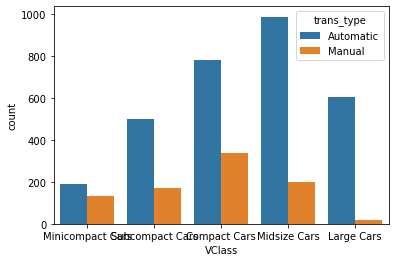

In [11]:
sb.countplot(data = fuel, x = 'VClass', hue = 'trans_type');

In [12]:
# Heatmap approach
ct_counts = fuel.groupby(['VClass', 'trans_type']).size()
print(ct_counts, '\n')

ct_counts = ct_counts.reset_index(name = 'count')
print(ct_counts, '\n')

ct_counts = ct_counts.pivot(index = 'VClass', columns = 'trans_type', values = 'count')
print(ct_counts)

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64 

             VClass trans_type  count
0  Minicompact Cars  Automatic    188
1  Minicompact Cars     Manual    133
2   Subcompact Cars  Automatic    502
3   Subcompact Cars     Manual    171
4      Compact Cars  Automatic    784
5      Compact Cars     Manual    338
6      Midsize Cars  Automatic    989
7      Midsize Cars     Manual    199
8        Large Cars  Automatic    605
9        Large Cars     Manual     20 

trans_type        Automatic  Manual
VClass                             
Minicompact Cars        188     133
Subcompact Cars         502     171
Compact Cars            784     

<AxesSubplot:xlabel='trans_type', ylabel='VClass'>

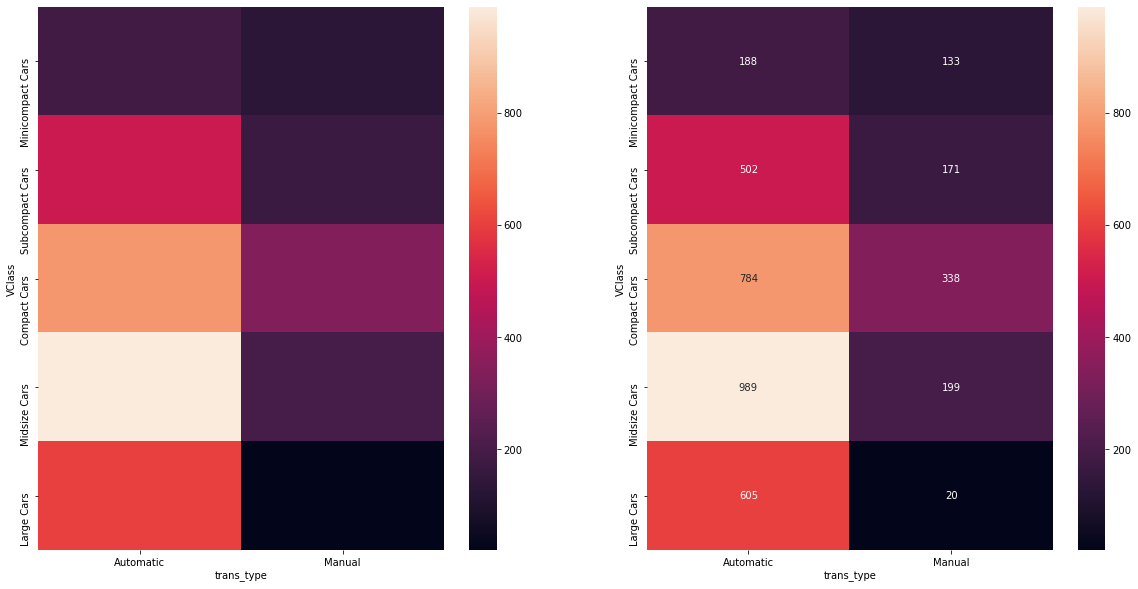

In [13]:
plt.figure(figsize = [20, 10])

# Plot heatmap
plt.subplot(1, 2, 1)
sb.heatmap(ct_counts)

# Add additional features to make easier to read
plt.subplot(1, 2, 2)
sb.heatmap(ct_counts, annot = True, fmt = 'd')

### FACETING

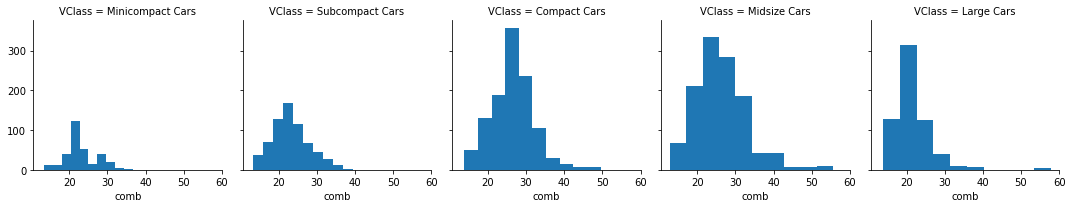

In [15]:
# Plot the Seaborn FacetGrid: all plots independant with identical axis limits
g = sb.FacetGrid(data = fuel, col = 'VClass')
g.map(plt.hist, 'comb');

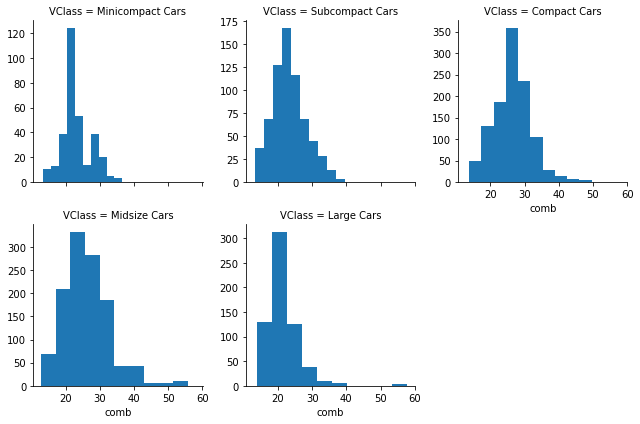

In [19]:
# Use dynamic bin edges
bin_width = 2
bins = np.arange(0, fuel['comb'].max() + bin_width, bin_width)
g = sb.FacetGrid(data = fuel, col = 'VClass', col_wrap = 3, sharey = False)
g.map(plt.hist, 'comb');

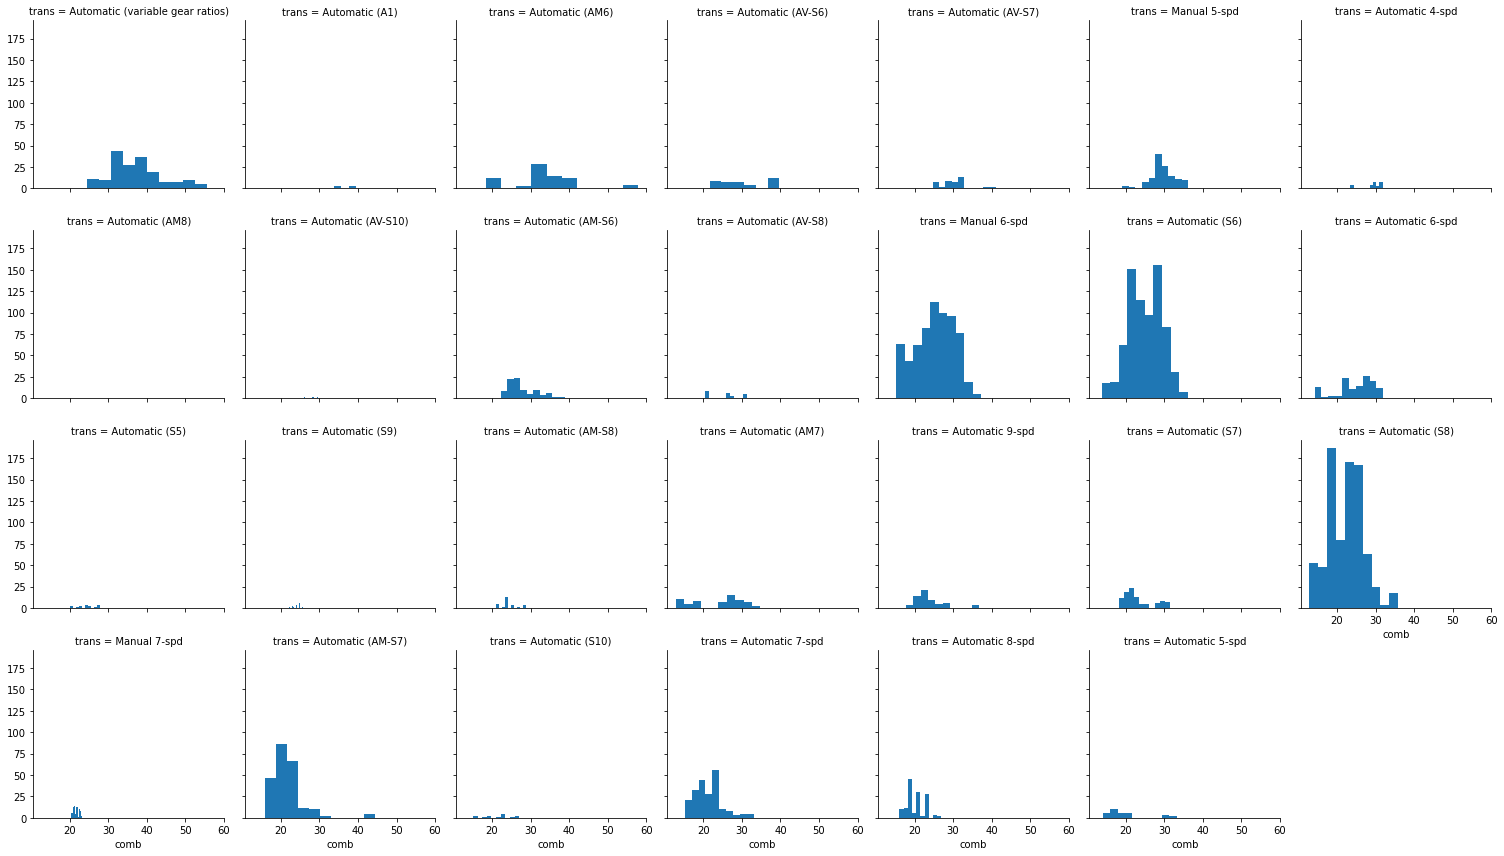

In [25]:
# Determine order to display facets (decreasing value) and for each transmission type, find combined fuel efficiency
group_means = fuel[['trans', 'comb']].groupby(['trans']).mean()

# Find indices of decreasing order
group_order = group_means.sort_values('comb', ascending = False).index

g = sb.FacetGrid(data = fuel, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

### ADAPTED BAR CHART

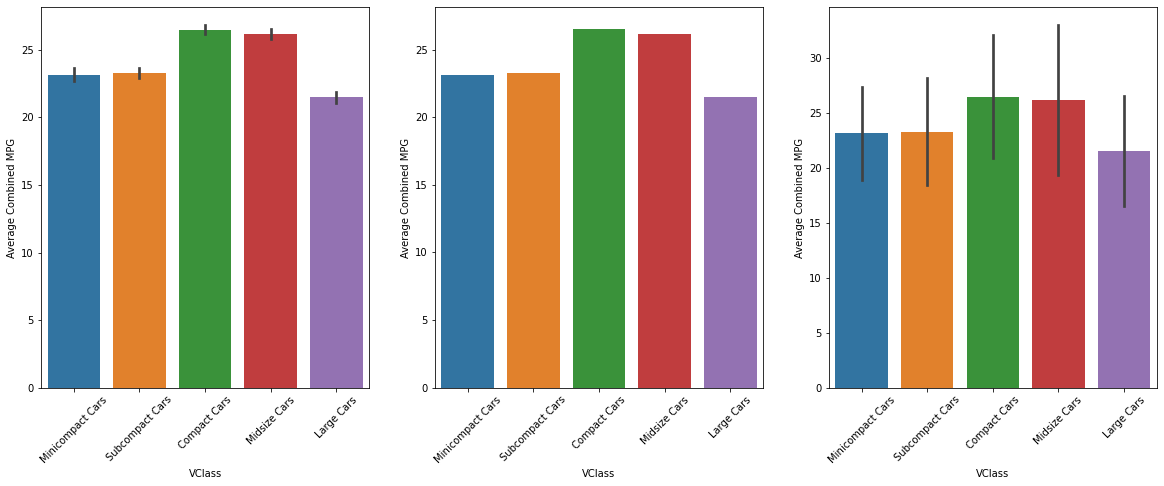

In [32]:
plt.figure(figsize = [20, 7])
# Base bar chart
plt.subplot(1, 3, 1)
sb.barplot(data = fuel, x = 'VClass', y = 'comb')
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');

# Remove Error Bars
plt.subplot(1, 3, 2)
sb.barplot(data = fuel, x = 'VClass', y = 'comb', errwidth = 0)
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');

# Change error bars to Std. Dev.
plt.subplot(1, 3, 3)
sb.barplot(data = fuel, x = 'VClass', y = 'comb', ci = 'sd')
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');

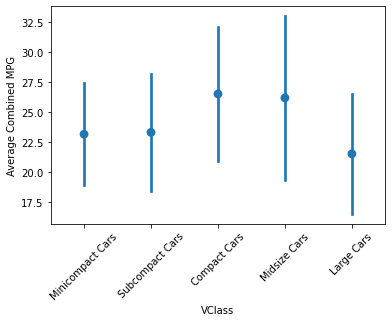

In [33]:
# Pointplot
sb.pointplot(data = fuel, x = 'VClass', y = 'comb', ci = 'sd', linestyles = '')
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');

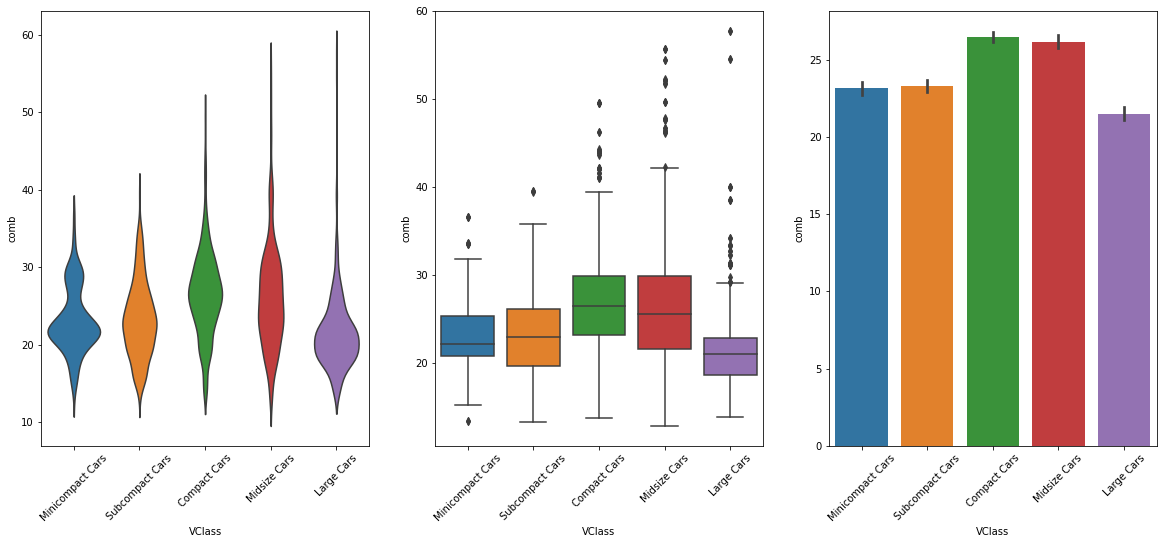

In [35]:
plt.figure(figsize = [20, 8])

# Violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = fuel, x = 'VClass', y = 'comb', inner = None)
plt.xticks(rotation = 45)

# Box Plot
plt.subplot(1, 3, 2)
sb.boxplot(data = fuel, x = 'VClass', y = 'comb')
plt.xticks(rotation = 45)

# Adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data = fuel, x = 'VClass', y = 'comb')
plt.xticks(rotation = 45);

### LINEPLOT
Shows similar data to histogram represented a different way

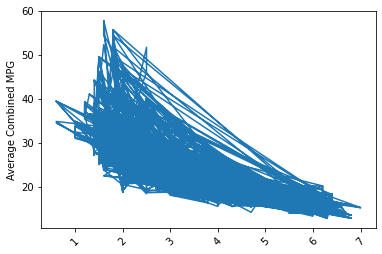

In [36]:
# Base errorbar plot
plt.errorbar(data = fuel, x = 'displ', y = 'comb')
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');

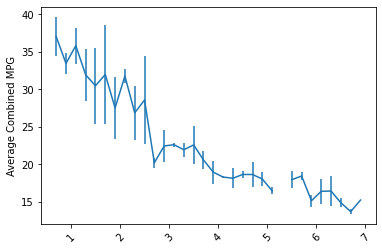

In [40]:
# Set number of bins and bin edges
edges = np.arange(.6, 7 + .2, .2)
centers = edges[:-1] + .1

# Cut the bin values into discrte intervals, return a series object
displ_binned = pd.cut(fuel['displ'], edges, include_lowest = True)

# For points in each bin, compute mean and standard error
comb_mean = fuel['comb'].groupby(displ_binned).mean()
comb_std = fuel['comb'].groupby(displ_binned).std()

# Plot data
plt.errorbar(x = centers, y = comb_mean, yerr = comb_std)
plt.xticks(rotation = 45)
plt.ylabel('Average Combined MPG');